In [1]:
import googlemaps
from datetime import datetime
import time
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.ops import cascaded_union

In [2]:
# geometry of madison and lakes
city = gpd.read_file("data/plot/background/madison-shp")
lakes = gpd.read_file("data/plot/background/water-shp")
street = gpd.read_file("data/plot/background/street-shp")
max_lon = city.bounds.maxx.max()
min_lon = city.bounds.minx.min()
max_lat = city.bounds.maxy.max()
min_lat = city.bounds.miny.min()

### Need Several Starting Points in order to obtain more than 20 instances

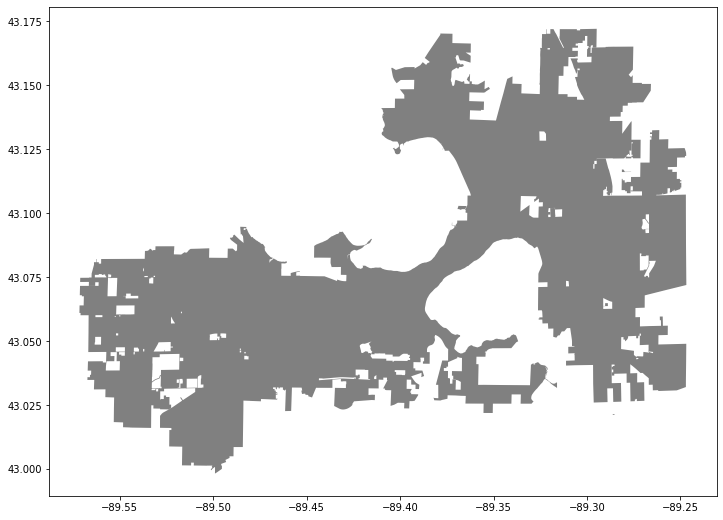

In [4]:
ax = city.plot(figsize=(15, 9), color='grey')

In [42]:
#    gmaps = googlemaps.Client(key=googleapikey)

ValueError: Invalid API key provided.

In [6]:
# pick radius of 17875 to get data around Madison
def get_data(key, starting_coords):
    lat = 43.0724324
    lon = -89.4036783
    data = []
    i = 0
    j = 0 
    for coord in starting_coords: 
        j += 1
        print(j, " IS DONE!!!!")
        next_page_token = None
        while True:
            i += 1
            time.sleep(2)
            if next_page_token == None:
                results = gmaps.places_nearby(location=coord, keyword=key, rank_by='distance')
            else:
                results = gmaps.places_nearby(page_token = next_page_token)
            print(i, ":  DONE!")
            time.sleep(1.5)
            data += results['results']
            try:
                next_page_token = results['next_page_token']
            except:
                break
    return data

def json_to_csv(data):
    info = []
    columns = ['name', 'business_status', 'rating', 'user_ratings_total', 'vicinity', 'lng', 'lat']
    for node in data:
        row = []
        for col in columns:
            if col in ['lng', 'lat']:
                val = node['geometry']['location'][col]
                row.append(val)
                continue
            try:
                val = node[col]
            except:
                continue
            row.append(val)
        info.append(row)
    df = pd.DataFrame(info, columns=columns)
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
    return df, gdf  

def uniform_random(n):
    city = gpd.read_file("data/plot/background/madison-shp")
    fig, ax = plt.subplots(figsize=(20,11))
    city.plot(ax=ax, color='grey')
    
    #Rectangle
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    start_x = xlims[0]
    end_x = xlims[1]
    start_y = ylims[0]
    end_y = ylims[1]
    
    #Rectangle Uniform Points
    current_x = start_x
    current_y = start_y
    w = (ylims[1] - ylims[0]) / n 

    pts = []
    while current_x < end_x:
        current_y = start_y
        while current_y  < end_y:
            point = Point(current_x, current_y)
            pts.append(point)
            current_y += w 
        current_x += w
        
    # Madison Polygon 
    key_pts = []

    polygons = city.geometry.to_list()
    irregular = cascaded_union(polygons)
    
    # Filter Points NOT in polygon
    for point in pts:
        if irregular.contains(point):
            key_pts.append(point)

    df = pd.DataFrame(key_pts, columns=['geometry'])
    gdf = gpd.GeoDataFrame(
        df, geometry='geometry'
    )
    
    # Visualize

    gdf.plot(ax=ax, color='black', markersize=5)
    print("Number of Points = ", len(key_pts))
    return key_pts


def does_contain(row):
    if polygon.contains(row.geometry):
        return True
    else:
        return False

Number of Points =  254


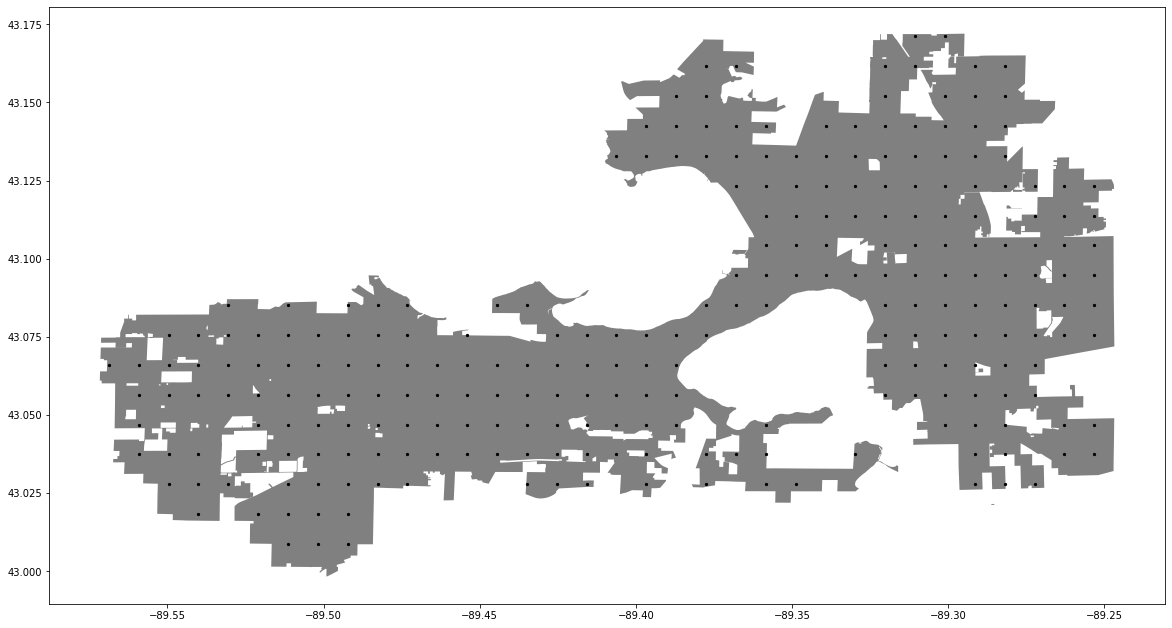

In [7]:
pts = uniform_random(20) #

In [19]:
starting_coords = [(pt.y, pt.x) for pt in pts]

In [40]:
# TO PERFORM SINGULAR TESTS (to get an idea of the type of results for each keyword before the looping)
# gmaps.places_nearby(location=coord, keyword='park', rank_by='distance')

In [32]:
data = get_data('park', starting_coords) # main looping process 

1  IS DONE!!!!
1 :  DONE!
2 :  DONE!
3 :  DONE!
2  IS DONE!!!!
4 :  DONE!
5 :  DONE!
6 :  DONE!
3  IS DONE!!!!
7 :  DONE!
8 :  DONE!
9 :  DONE!
4  IS DONE!!!!
10 :  DONE!
11 :  DONE!
12 :  DONE!
5  IS DONE!!!!
13 :  DONE!
14 :  DONE!
15 :  DONE!
6  IS DONE!!!!
16 :  DONE!
17 :  DONE!
18 :  DONE!
7  IS DONE!!!!
19 :  DONE!
20 :  DONE!
21 :  DONE!
8  IS DONE!!!!
22 :  DONE!
23 :  DONE!
24 :  DONE!
9  IS DONE!!!!
25 :  DONE!
26 :  DONE!
27 :  DONE!
10  IS DONE!!!!
28 :  DONE!
29 :  DONE!
30 :  DONE!
11  IS DONE!!!!
31 :  DONE!
32 :  DONE!
33 :  DONE!
12  IS DONE!!!!
34 :  DONE!
35 :  DONE!
36 :  DONE!
13  IS DONE!!!!
37 :  DONE!
38 :  DONE!
39 :  DONE!
14  IS DONE!!!!
40 :  DONE!
41 :  DONE!
42 :  DONE!
15  IS DONE!!!!
43 :  DONE!
44 :  DONE!
45 :  DONE!
16  IS DONE!!!!
46 :  DONE!
47 :  DONE!
48 :  DONE!
17  IS DONE!!!!
49 :  DONE!
50 :  DONE!
51 :  DONE!
18  IS DONE!!!!
52 :  DONE!
53 :  DONE!
54 :  DONE!
19  IS DONE!!!!
55 :  DONE!
56 :  DONE!
57 :  DONE!
20  IS DONE!!!!
58 :  DONE!
59

<AxesSubplot:>

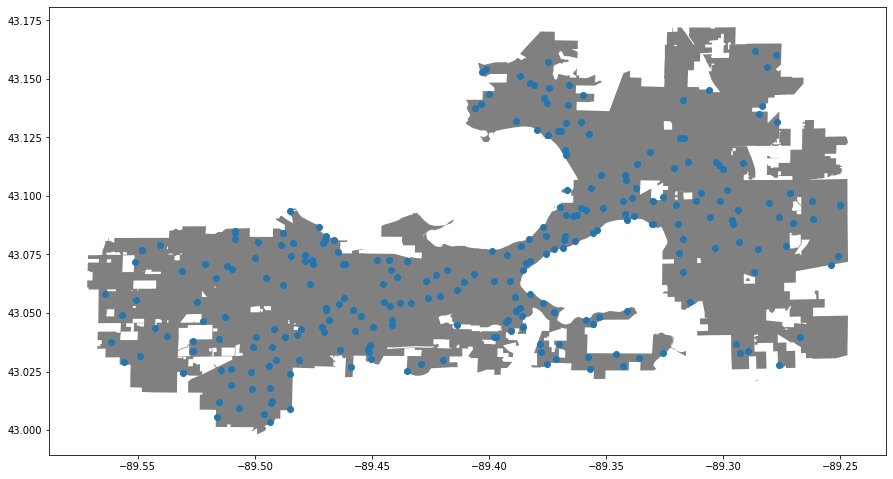

In [33]:
# Filter by whether points are within the Madison City Boundaries
df, gdf = json_to_csv(data)
gdf = gdf.drop_duplicates()
ax = city.plot(figsize=(15, 9), color='grey')
polygon = unary_union(city.geometry)
filtered = gdf[gdf.apply(does_contain, axis=1)].reset_index(drop=True)
# ax.set_axis_off()
filtered.plot(ax=ax)
# ax.set_axis_off()

<AxesSubplot:>

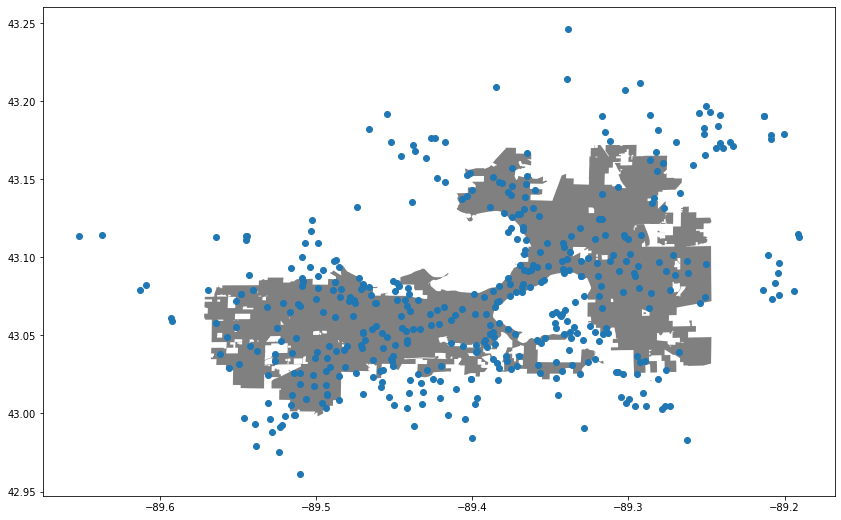

In [37]:
ax = city.plot(figsize=(15, 9), color='grey')
gdf.plot(ax=ax)

In [41]:
gdf.loc[:10]

,name,business_status,rating,user_ratings_total,vicinity,lng,lat,geometry
0,Sugar Maple Park,OPERATIONAL,4.4,28,"252 Sugar Maple Ln, Verona",-89.563906,43.058146,POINT (-89.56391 43.05815)
1,Sauk Heights Park,OPERATIONAL,4.1,19,"525 Bear Claw Way, Middleton",-89.551237,43.071722,POINT (-89.55124 43.07172)
2,Cardinal Glenn Park,OPERATIONAL,4.6,28,"426 Pine Lawn Pkwy, Verona",-89.550993,43.055626,POINT (-89.55099 43.05563)
3,Voss Park,OPERATIONAL,3.8,8,"3729 Swoboda Rd, Verona",-89.592422,43.059296,POINT (-89.59242 43.05930)
4,The Purple Park,OPERATIONAL,4.0,2,"734 Hidden Cave Rd, Madison",-89.548085,43.076754,POINT (-89.54809 43.07675)
5,Blackhawk Park,OPERATIONAL,4.5,70,"741 Bear Claw Way, Madison",-89.548077,43.076754,POINT (-89.54808 43.07675)
6,Thousand Oaks Park,OPERATIONAL,4.7,16,"9725 Sunny Spring Dr, Verona",-89.556920,43.049244,POINT (-89.55692 43.04924)
7,Swallowtail Park,OPERATIONAL,4.7,15,"901 Swallowtail Dr, Madison",-89.540623,43.078960,POINT (-89.54062 43.07896)
8,Junction Ridge Park,OPERATIONAL,4.2,40,"8502 Elderberry Rd, Madison",-89.531238,43.068098,POINT (-89.53124 43.06810)
9,Hill Creek Park,OPERATIONAL,4.6,16,"9818 Hill Creek Dr, Verona",-89.561259,43.037778,POINT (-89.56126 43.03778)


In [39]:
gdf.to_file("data/services/parks/parks.shp")